# Churn Analysis

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#import data
df = pd.read_csv(r"C:\Users\Harshit\Downloads\barclayns\Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#dropoff columns
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [7]:
# Create age group column using if-else
def age_group(age):
    if 18 <= age <= 30:
        return "18-30"
    elif 31 <= age <= 45:
        return "31-45"
    elif 46 <= age <= 60:
        return "46-60"
    else:
        return "60+"

df["Age_Group"] = df["Age"].apply(age_group)



In [8]:
#creating a balance sagment using if else 
def balance_segment(balance):
    if balance == 0:
        return "zero balance"
    elif 1<= balance <=50000:
        return "low"
    elif 50001 <= balance <=200000:
        return "medium"
    else:
        return "high"
    

df["balance_segment"] = df["Balance"].apply(balance_segment)

In [9]:
#creating a credit score using if else 

def credit_rate(creditScore):
    if creditScore < 580:
        return "poor"
    elif 580 <= creditScore <= 669:
        return "fair"
    elif 670<= creditScore <=739:
        return "good"
    else:
        return "excellent"
    

df["credit_rate"] = df["CreditScore"].apply(credit_rate)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,balance_segment,credit_rate
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31-45,zero balance,fair
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31-45,medium,fair
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31-45,medium,poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-45,zero balance,good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31-45,medium,excellent


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Age_Group        10000 non-null  object 
 12  balance_segment  10000 non-null  object 
 13  credit_rate      10000 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


In [12]:
# total customers
total_customers = df.shape[0]
print(total_customers)

10000


In [13]:
# total customers churend
total_churend = df["Exited"].sum()
print(total_churend)

2037


In [14]:
#churend in presentage
churn_rate = (total_churend/total_customers)*100
print(churn_rate)

20.369999999999997


In [15]:
# Average credit Score
avg_creditScore = df["CreditScore"].mean()
print(avg_creditScore)

650.5288


In [16]:
# average balance
avg_balance = df["Balance"].mean()
print(avg_balance)

76485.889288


In [17]:
#Total active members
total_activeMember = df["IsActiveMember"].sum()
print(total_activeMember)

5151


In [18]:
# Active members in persentage 
active_percentage = (total_activeMember/total_customers)*100
print(active_percentage)

51.51


# Customers churn by age groups 

In [19]:
# grouping number of churend according to age group
churn_by_age = df.groupby("Age_Group")["Exited"].sum()
total_churn = churn_by_age.sum()
#churend in persentage according to Age group
churn_share_percent = (churn_by_age / total_churn) * 100
print(churn_share_percent)

Age_Group
18-30     7.265587
31-45    45.753559
46-60    41.335297
60+       5.645557
Name: Exited, dtype: float64


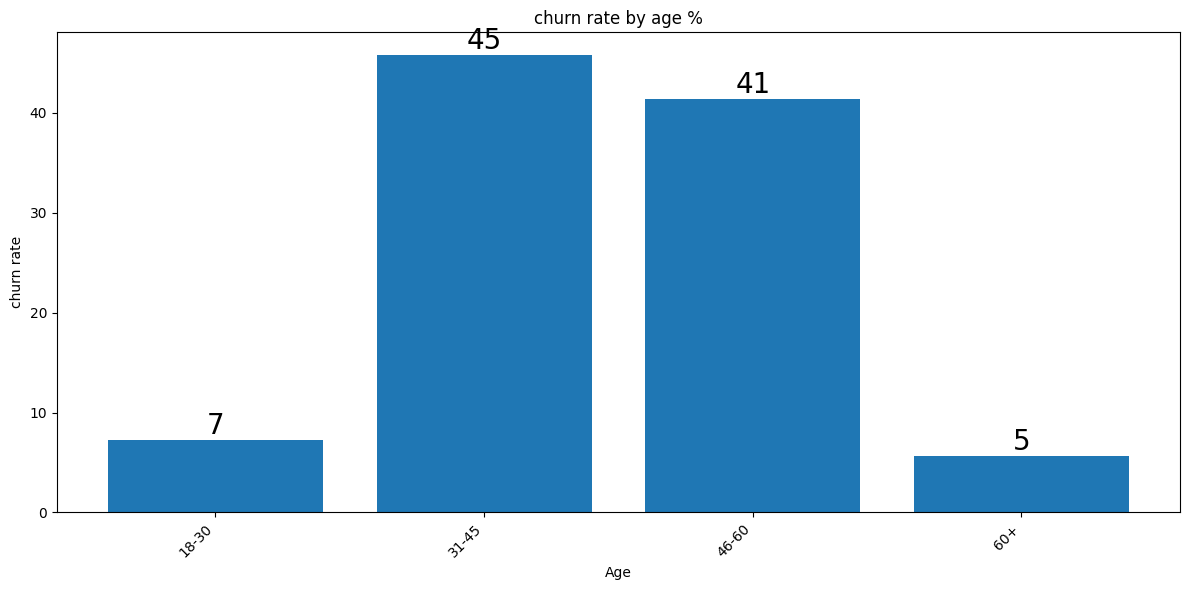

In [61]:
plt.figure(figsize=(12,6))
bars = plt.bar(churn_share_percent.index, churn_share_percent.values)

# Add number labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position
        height,                           # Y-position (top of bar)
        str(int(height)),                 # Text value
        ha='center', va='bottom', fontsize=20)


plt.title("churn rate by age %")
plt.xlabel("Age")
plt.ylabel("churn rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

* 1 Customers aged 31–45 and 46–60 show the highest churn (45–41%), indicating risk in mid-career and pre-retirement segments.
* 2️ Offer tailored financial products such as home loans, investment plans, and retirement planning to strengthen long-term engagement.
* 3️ Improve relationship management, personalized advisory services, and proactive financial guidance for these age groups.

# customers churn by Geography in %

In [21]:
#Grouping churn by geography
Geo_churn=df.groupby("Geography")["Exited"].sum()
ttl_churn = Geo_churn.sum()
# churn rate by geography
geo_churn_rate = (Geo_churn/ttl_churn)*100
print(geo_churn_rate)

Geography
France     39.764359
Germany    39.960727
Spain      20.274914
Name: Exited, dtype: float64


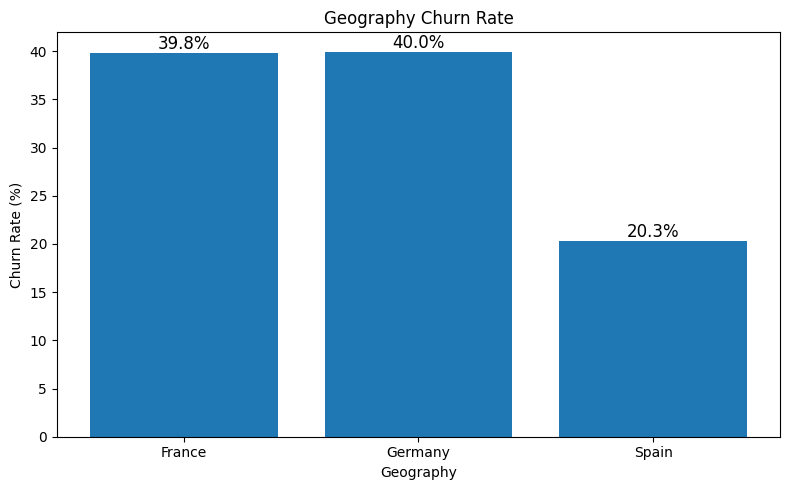

In [84]:
# Create figure
plt.figure(figsize=(8,5))

# Create bar chart
bars = plt.bar(
    geo_churn_rate.index,
    geo_churn_rate.values
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title("Geography Churn Rate")
plt.xlabel("Geography")
plt.ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()

* 1️ Germany and France show significantly higher churn (40%) compared to Spain (20%), indicating regional performance gaps.
* 2️ Conduct localized market analysis to understand customer expectations, competition, and service quality issues in high-churn regions.
* 3️ Launch region-specific retention campaigns, pricing adjustments, and customer experience improvements.
* 4️ Strengthen local partnerships and customer support presence to improve satisfaction and reduce churn.

# Customers churn by activity status in %

In [60]:
#grouping IsActiveMember by Exited
churn_by_activity=df.groupby("IsActiveMember")["Exited"].mean()*100
print(churn_by_activity)

IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


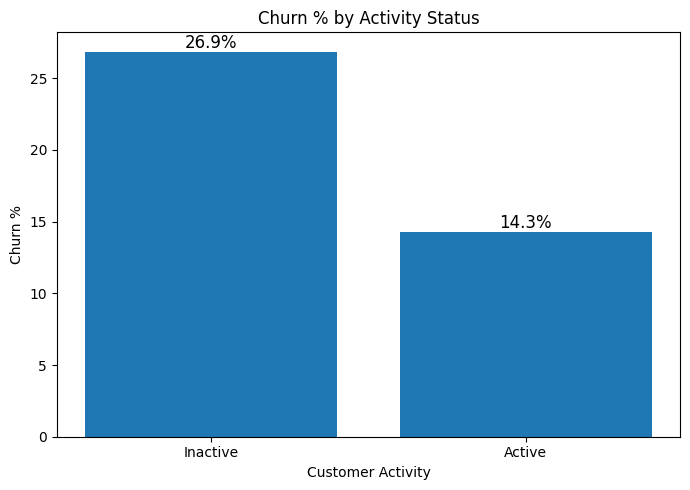

In [85]:
# Map labels
activity_labels = {0: "Inactive", 1: "Active"}
x_labels = churn_by_activity.index.map(activity_labels)
y_values = churn_by_activity.values
# Create figure
plt.figure(figsize=(7,5))
# Create bar chart
bars = plt.bar(x_labels, y_values)
# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title("Churn % by Activity Status")
plt.xlabel("Customer Activity")
plt.ylabel("Churn %")

plt.tight_layout()
plt.show()

* 1️ Inactive customers have significantly higher churn (26.85%) compared to active customers (14.27%), highlighting the importance of engagement.
* 2️ Launch targeted re-engagement campaigns such as personalized offers, reminders, and digital usage incentives.
* 3️ Improve mobile app features, onboarding support, and proactive communication to increase customer activity.
* 4️ Implement early warning alerts to identify inactive users and intervene before churn occurs.

# customers churn by Numbers of product in %

In [82]:
# grouping NumOfProducts to Exited
churn_by_products = df.groupby("NumOfProducts")["Exited"].mean()*100
print(churn_by_products)

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64


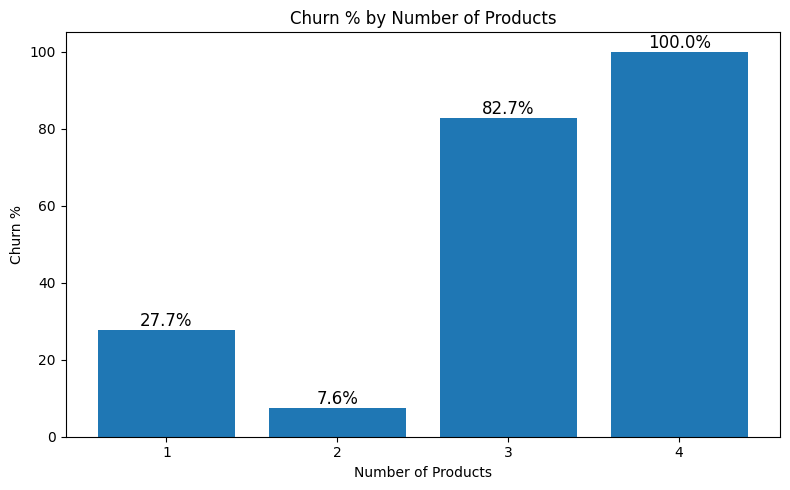

In [86]:
x_labels = churn_by_products.index
y_values = churn_by_products.values

# Create figure
plt.figure(figsize=(8,5))

# Create bar chart
bars = plt.bar(x_labels, y_values)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title("Churn % by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn %")

plt.xticks(x_labels)   # ensure clean x-axis labels
plt.tight_layout()
plt.show()


* 1️ Customers with 2 products show the lowest churn (7.6%), indicating strong engagement — promote cross-selling to move customers into this segment.
* 2️ Customers with 1 product have moderate churn (27.7%) — encourage onboarding bundles and loyalty incentives.
* 3️ Extremely high churn for 3–4 product customers (82–100%) suggests possible service complexity or data imbalance — investigate customer experience and sample size.
* 4️ Focus retention campaigns on high-risk multi-product customers and simplify bundled product offerings.

# customers churend by balance status in %

In [81]:
# grouping balance segment to Exited
churn_by_balance_segment = df.groupby("balance_segment")["Exited"].mean()*100
print(churn_by_balance_segment)

balance_segment
high            55.882353
low             34.666667
medium          23.780682
zero balance    13.823611
Name: Exited, dtype: float64


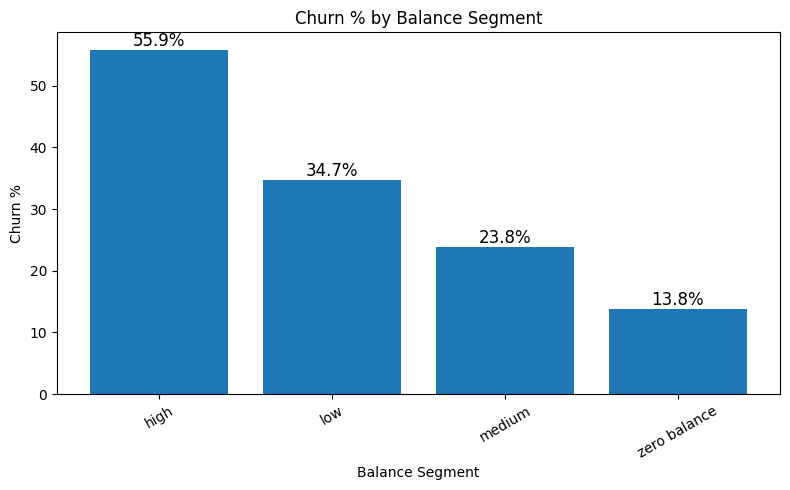

In [87]:
x_labels = churn_by_balance_segment.index
y_values = churn_by_balance_segment.values

# Create figure
plt.figure(figsize=(8,5))

# Create bar chart
bars = plt.bar(x_labels, y_values)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title("Churn % by Balance Segment")
plt.xlabel("Balance Segment")
plt.ylabel("Churn %")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# High Balance Customers Are Leaving More

This is unexpected — high-value customers usually churn less.

 Possible reasons:

* Better offers from competitors

* Poor premium services

* Pricing dissatisfaction

* Relationship manager issues

 -This is a business risk — banks must retain high-value clients.

# CUSTOMERS CHUREND BY GENDERS IN %

In [79]:
# grouping genders by exited
churn_by_gender = df.groupby("Gender")["Exited"].mean()*100
print(churn_by_gender)

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


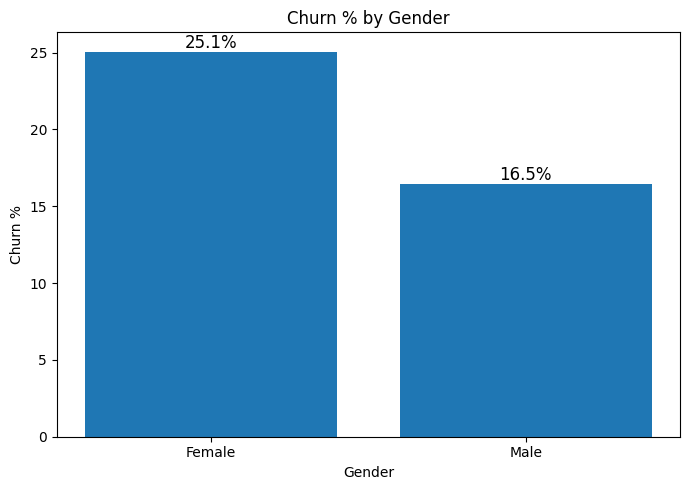

In [88]:
x_labels = churn_by_gender.index
y_values = churn_by_gender.values

# Create figure
plt.figure(figsize=(7,5))

# Create bar chart
bars = plt.bar(x_labels, y_values)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title("Churn % by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn %")

plt.tight_layout()
plt.show()


This difference suggests that female customers may be experiencing:

* Lower satisfaction with products or services.

* Gaps in digital experience or customer support.

* Product offerings that may not fully match their financial needs